In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import json
from tabulate import tabulate
import random

from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize,MinMaxScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [2]:
# Reading first data
movie_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_movies.csv")
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
# Reading second Data
credit_df=pd.read_csv("DS_C14_Capstone_tmdb_5000_credits.csv")
credit_df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
# dropping title feature
movie_df.drop("title",axis=1,inplace=True)

In [5]:
# Merging Two Dataframe
movie_data=movie_df.merge(credit_df,left_on='id', right_on='movie_id')
movie_data.drop("movie_id",axis=1,inplace=True)
movie_data.head(2)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
# Shape of the data
movie_data.shape

(4803, 20)

In [7]:
# Data Information
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

In [8]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

,number of nulls,percentage of nulls
budget,0.0,0.000000
genres,0.0,0.000000
homepage,3091.0,64.355611
id,0.0,0.000000
keywords,0.0,0.000000
original_language,0.0,0.000000
overview,3.0,0.062461
popularity,0.0,0.000000
production_companies,0.0,0.000000
production_countries,0.0,0.000000


In [9]:
# unique values in each feature.
movie_data.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
status                     3
tagline                 3944
vote_average              71
vote_count              1609
title                   4800
cast                    4761
crew                    4776
dtype: int64

In [10]:
# Null value imputation.
movie_data.drop("homepage",axis=1,inplace=True)
movie_data["tagline"].fillna("Unknown_tagline",inplace=True)
movie_data["overview"].fillna("Unknown_overview",inplace=True)
movie_data["runtime"].fillna(round(movie_data["runtime"].mean()),inplace=True)

In [11]:
# converting release date feature datatype object to datetime and two new features created year and month.
movie_data['release_year'] = pd.DatetimeIndex(movie_data['release_date']).year
movie_data['release_month'] = pd.DatetimeIndex(movie_data['release_date']).month

In [12]:
# checking for duplicated records.
movie_data.duplicated().sum()

0

In [13]:
# Description of the data
movie_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4802.000000,4802.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875911,6.092172,690.217989,2002.468763,6.642232
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607225,1.194612,1234.585891,12.414354,3.534499
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,1999.000000,4.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2005.000000,7.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000,2011.000000,10.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000,12.000000


In [14]:
# created a function to convert json to str(string) format
def json_to_string(row):
    json_data = json.loads(row)
    values=[data.get("name") for data in json_data]   
    return values[:]

In [15]:
# Extracted the Genre Type from genres
d_genre = movie_data["genres"].apply(json_to_string)

movie_data["genre_type"] = d_genre.apply(lambda x:x[0] if len(x)>=1 else None)

In [16]:
# Extracted the production_countrty from production countries
d_prdtn_cmpny = movie_data['production_countries'].apply(json_to_string)
movie_data['production_country'] = d_prdtn_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [17]:
# Extracted the lead name for cast
ld_nme = movie_data['cast'].apply(json_to_string)
movie_data['lead_name'] =ld_nme.apply(lambda x:x[0] if len(x)>=1 else None)

In [18]:
# Extracted the production company from production companies
prd_cmpny = movie_data['production_companies'].apply(json_to_string)
movie_data['production_company']  = prd_cmpny.apply(lambda x:x[0] if len(x)>=1 else None)

In [19]:
#created a function to extract the lead_character_name from cast
def js(row):
    json_data = json.loads(row)
    values=[data.get("character") for data in json_data]
    return values[:3] 

In [20]:
# extract the lead_character_name from cast
lead_chatacter_name = movie_data['cast'].apply(js)
movie_data['lead_chatacter_name'] = lead_chatacter_name.apply(lambda x:x[0] if len(x)>=1 else None)

In [21]:
# extracted the Directors name.
movie_data['crew'] = movie_data['crew'].apply(json.loads)
extract_director_names = lambda x: [person['name'] for person in x if person['job'] == 'Director']
director_names = movie_data['crew'].apply(extract_director_names)
movie_data['directors'] = director_names.apply(lambda x:x[0] if len(x)>=1 else None)

In [22]:
# Dropping unnessesary columns.
movie_data.drop(['id','genres','keywords','production_companies', 'production_countries','cast', 'crew', 'release_date', 'overview','tagline'], axis=1, inplace=True)

In [23]:
# number of movies with runtime 0
len(movie_data[movie_data["runtime"]==0])

35

In [24]:
# number of movies with revenue 0
len(movie_data[ (movie_data["revenue"]==0)])

1427

In [25]:
# number of movies with Budget 0
len(movie_data[ (movie_data["budget"]==0)])

1037

In [26]:
# eliminating records with 0 runtime
movie_data=movie_data[movie_data["runtime"]!=0]

In [27]:
# Imputing of revenue and budget which have 0 values by random quantile 30 to 70.
np.random.seed(35)
list1=np.random.randint(30,70,size=len(movie_data))
j=0
for i in list(movie_data[ (movie_data["budget"]==0)].index):
    movie_data["budget"][i]=movie_data["budget"].quantile(list1[j]/100)
    j+=1
k=0
for i in list(movie_data[ (movie_data["revenue"]==0)].index):
    movie_data["revenue"][i]=movie_data["revenue"].quantile(list1[k]/100)
    k+=1

In [28]:
# new feature profit created by substracting Budget from revenue
movie_data['profit'] = movie_data['revenue'] - movie_data['budget']

In [29]:
# Information of new data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4768 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               4768 non-null   float64
 1   original_language    4768 non-null   object 
 2   popularity           4768 non-null   float64
 3   revenue              4768 non-null   float64
 4   runtime              4768 non-null   float64
 5   status               4768 non-null   object 
 6   vote_average         4768 non-null   float64
 7   vote_count           4768 non-null   int64  
 8   title                4768 non-null   object 
 9   release_year         4768 non-null   float64
 10  release_month        4768 non-null   float64
 11  genre_type           4753 non-null   object 
 12  production_country   4620 non-null   object 
 13  lead_name            4738 non-null   object 
 14  production_company   4446 non-null   object 
 15  lead_chatacter_name  4738 non-null   o

In [30]:
# Null values and percentage of null values in feature.
nulls=pd.DataFrame([movie_data.isnull().sum(),(movie_data.isnull().sum()/movie_data.shape[0])*100]).transpose()
nulls.rename(columns={0:"number of nulls",1:"percentage of nulls"},inplace=True)
nulls

,number of nulls,percentage of nulls
budget,0.0,0.000000
original_language,0.0,0.000000
popularity,0.0,0.000000
revenue,0.0,0.000000
runtime,0.0,0.000000
status,0.0,0.000000
vote_average,0.0,0.000000
vote_count,0.0,0.000000
title,0.0,0.000000
release_year,0.0,0.000000


In [31]:
# Imputing Null values in genre type feature
movie_data["genre_type"].fillna(movie_data["genre_type"].mode()[0],inplace=True)

In [32]:
# Dropping all null values from the data
movie_data.dropna(inplace=True)

In [33]:
# unique values in each feature.
movie_data.nunique()

budget                  463
original_language        34
popularity             4418
revenue                4311
runtime                 151
status                    2
vote_average             67
vote_count             1609
title                  4417
release_year             89
release_month            12
genre_type               20
production_country       65
lead_name              1866
production_company     1292
lead_chatacter_name    3883
directors              2087
profit                 4371
dtype: int64

In [34]:
#created a function to seperate the object features from Numerical features
def dtype(df):
    cat = []
    con = []
    for col in df:
        if((df[col].nunique() <15) |(df[col].dtype == 'object')):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(movie_data)
print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical          Numerical
-------------------  ------------
original_language    budget
status               popularity
title                revenue
release_month        runtime
genre_type           vote_average
production_country   vote_count
lead_name            release_year
production_company   profit
lead_chatacter_name
directors


## --------------------------------------------------------EDA ----------------------------------------------------------------------

## Univariate for Categorical columns

In [35]:
def bar_pie(*s):
    for col in s:
        value_counts=movie_data[col].value_counts()
        
        if col=="production_country":
            fig,ax=plt.subplots(1,2,figsize=(12,8))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        else:
            fig,ax=plt.subplots(1,2,figsize=(12,4))
            sns.barplot(y=value_counts.index,x=value_counts.values,ax=ax[0],orient="h")
        ax[0].set_title(f"count of {col} in each type")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")

        per=movie_data[col].value_counts(normalize=True)*100
        ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
        ax[1].set_title(f"percentage of {col}")

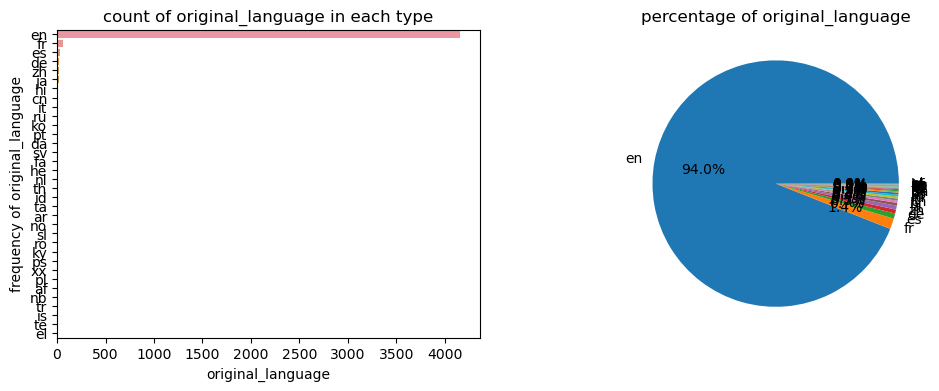

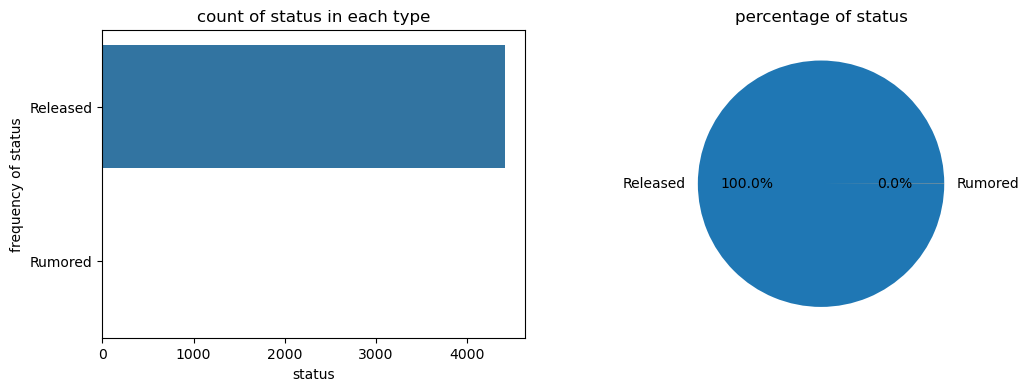

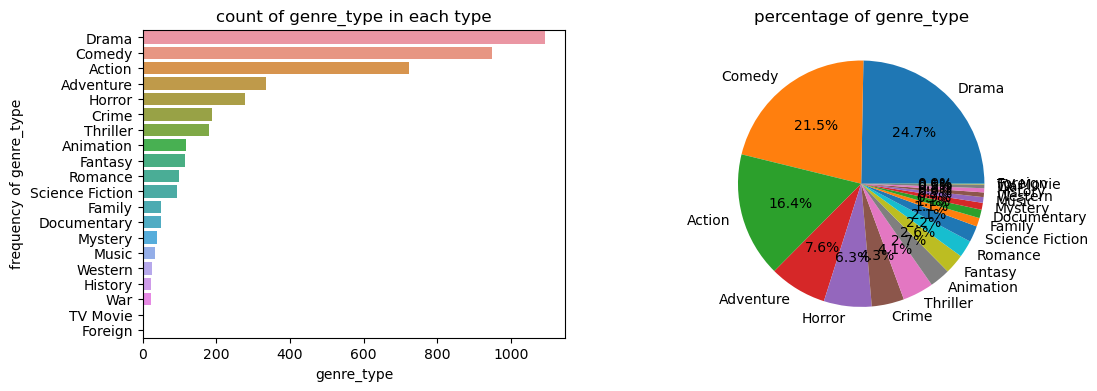

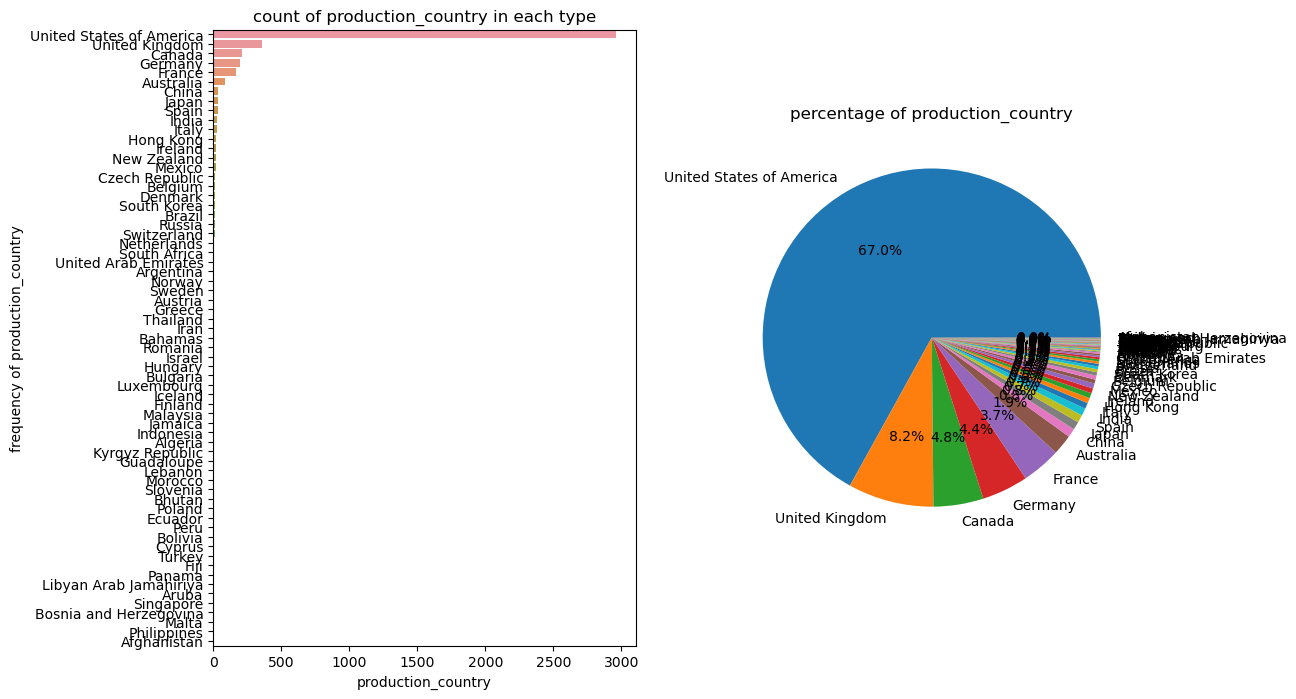

In [36]:
 bar_pie('original_language',
 'status',
 'genre_type',
 'production_country',)

## Univariate for Numerical columns

In [37]:
def hist_box(*s):
    for col in s:
        values=movie_data[col].values
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        sns.histplot(values,bins=20,ax=ax[0])
        ax[0].set_title(f"Distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")


        sns.boxplot(y=movie_data[col],ax=ax[1])
        ax[1].set_title(f"Distribution using boxplot of {col}")

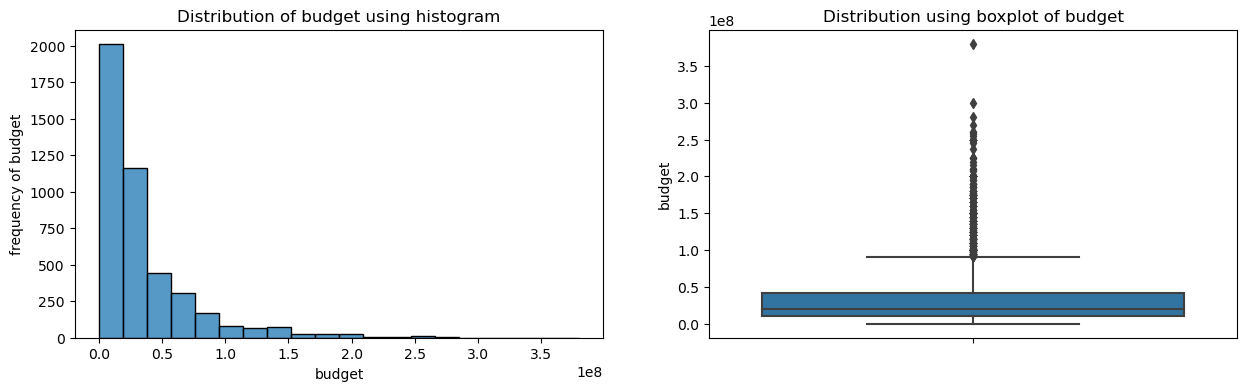

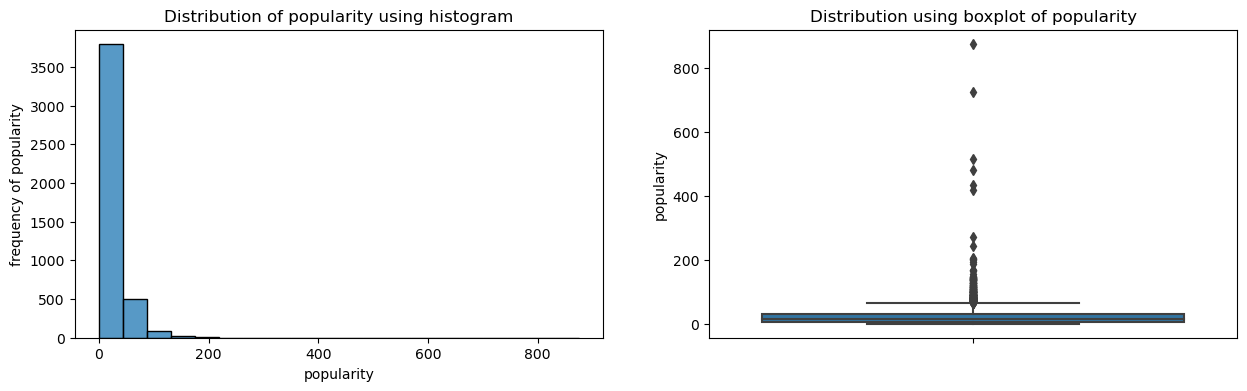

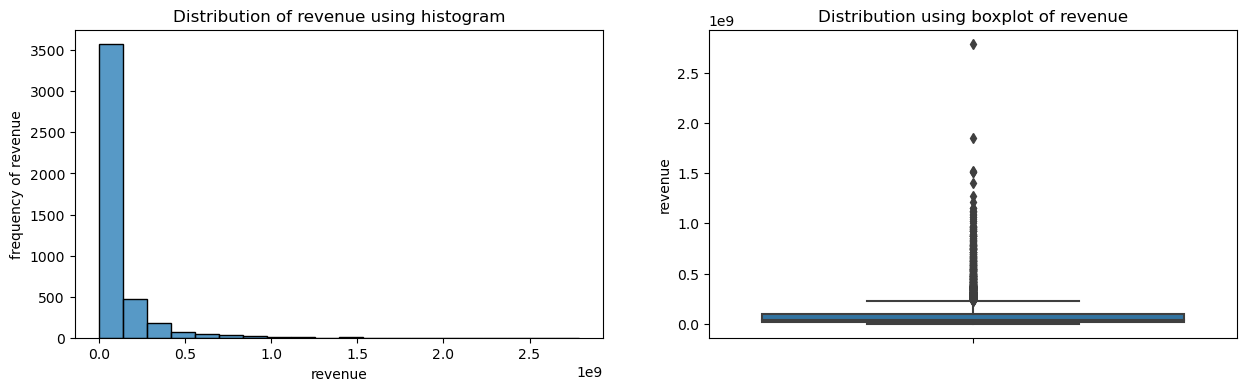

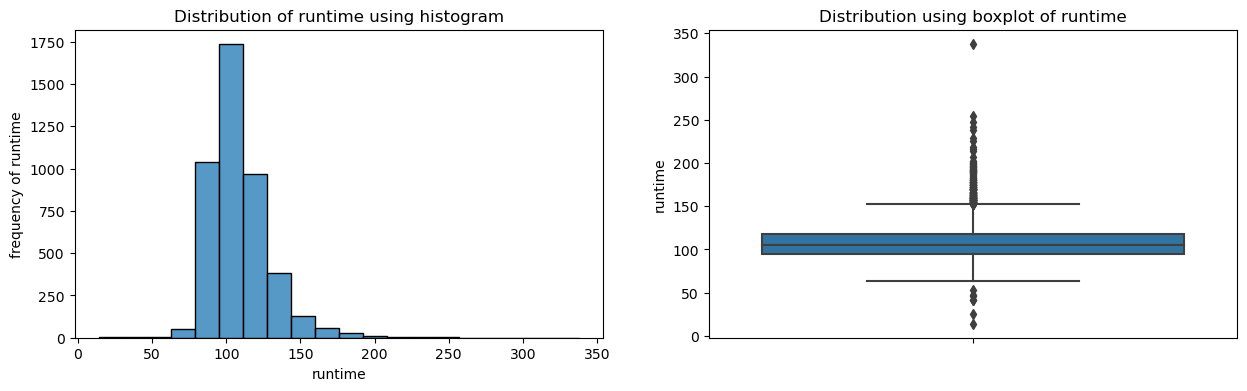

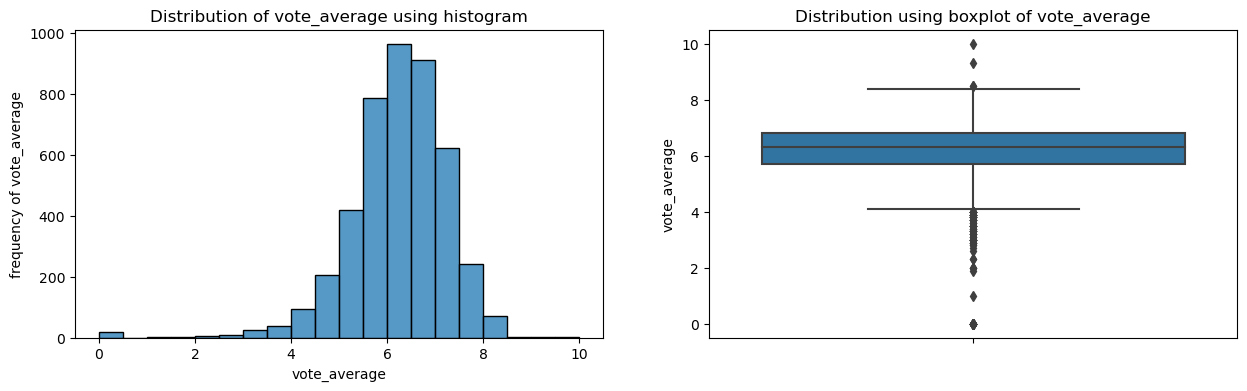

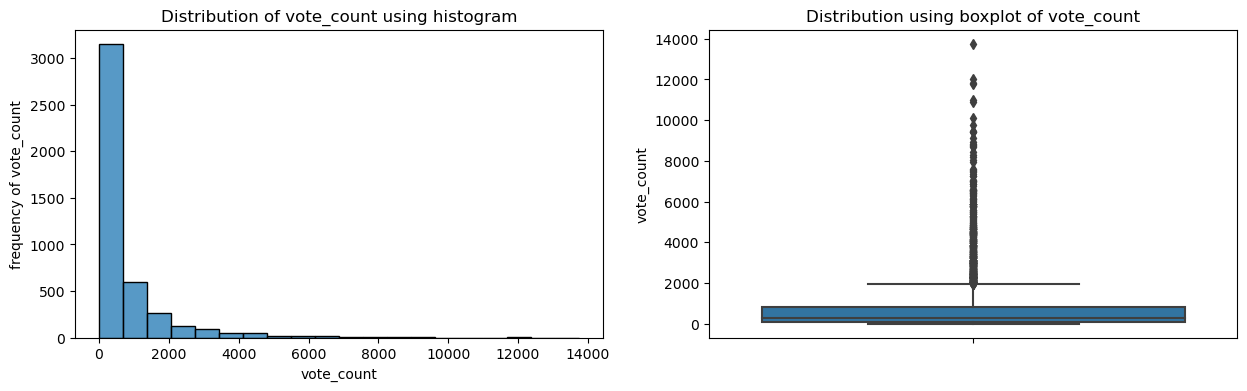

In [38]:
hist_box("budget","popularity","revenue","runtime","vote_average","vote_count")

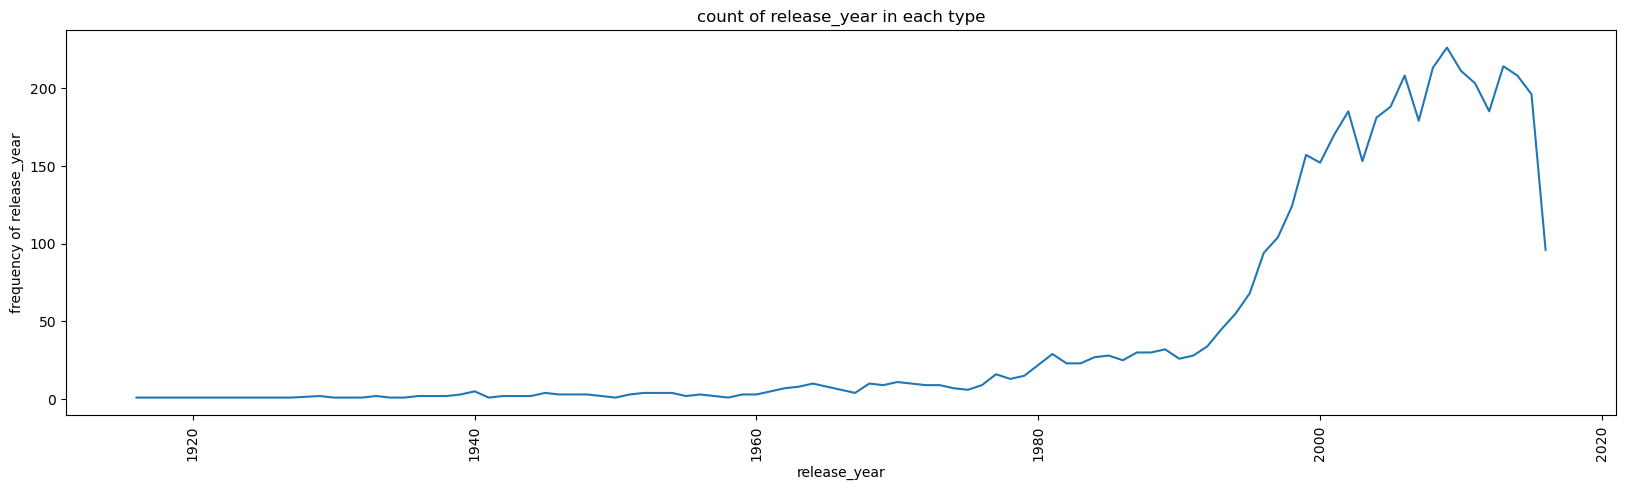

In [39]:
value_counts=movie_data["release_year"].value_counts()
plt.figure(figsize=(20,5))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_year in each type")
plt.xlabel("release_year")
plt.ylabel("frequency of release_year")
plt.xticks(rotation=90)
plt.show()

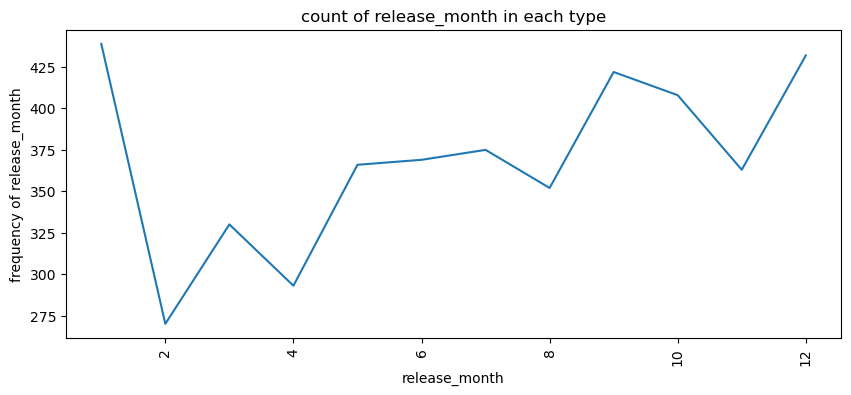

In [40]:
value_counts=movie_data["release_month"].value_counts()
plt.figure(figsize=(10,4))
sns.lineplot(value_counts.index,value_counts.values)
plt.title("count of release_month in each type")
plt.xlabel("release_month")
plt.ylabel("frequency of release_month")
plt.xticks(rotation=90)
plt.show()

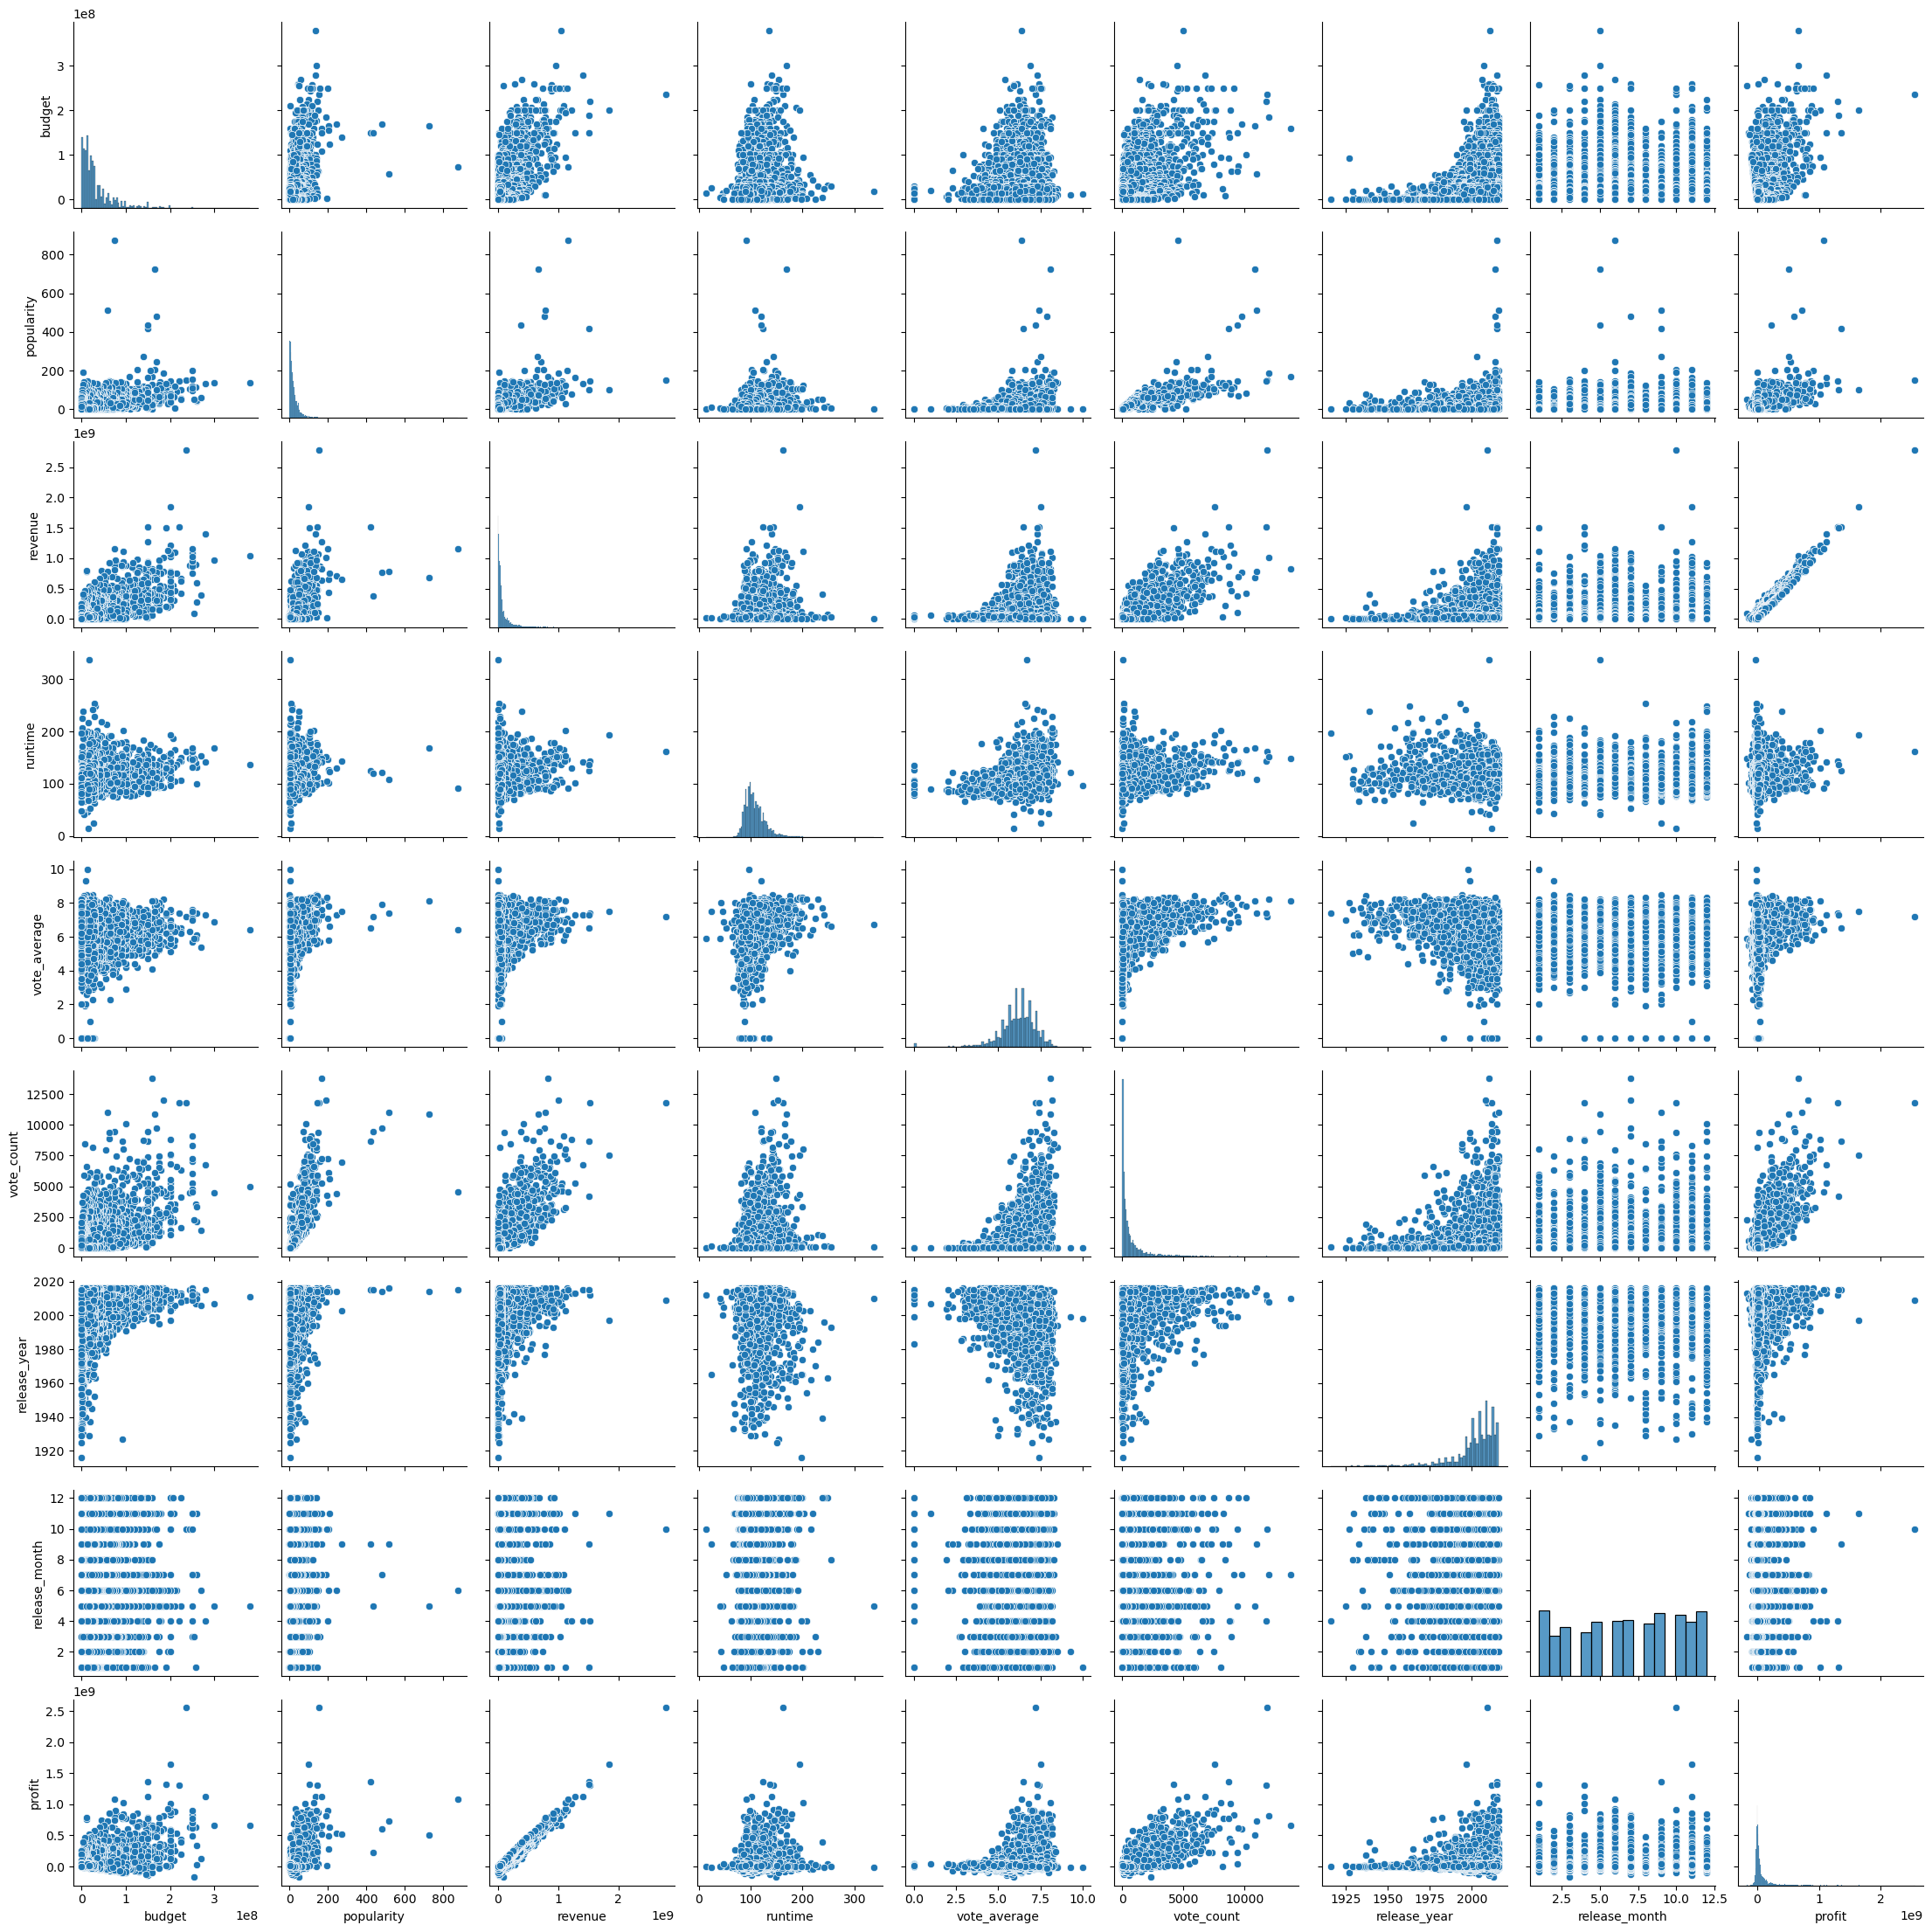

In [41]:
sns.pairplot(movie_data)
plt.show()

## Bivariate

In [42]:
def bi_rat(*s):
        fig,ax=plt.subplots(2,1,figsize=(15,10))
        ax=ax.ravel()
       
        for col in s:
            sns.lineplot(x="release_year",y=col,data=movie_data,ax=ax[0])
            ax[0].set_title(f"release_year wise {col}")
            sns.lineplot(x="release_month",y=col,data=movie_data,ax=ax[1])
            ax[1].set_title(f"release_month wise {col}")
        plt.show()

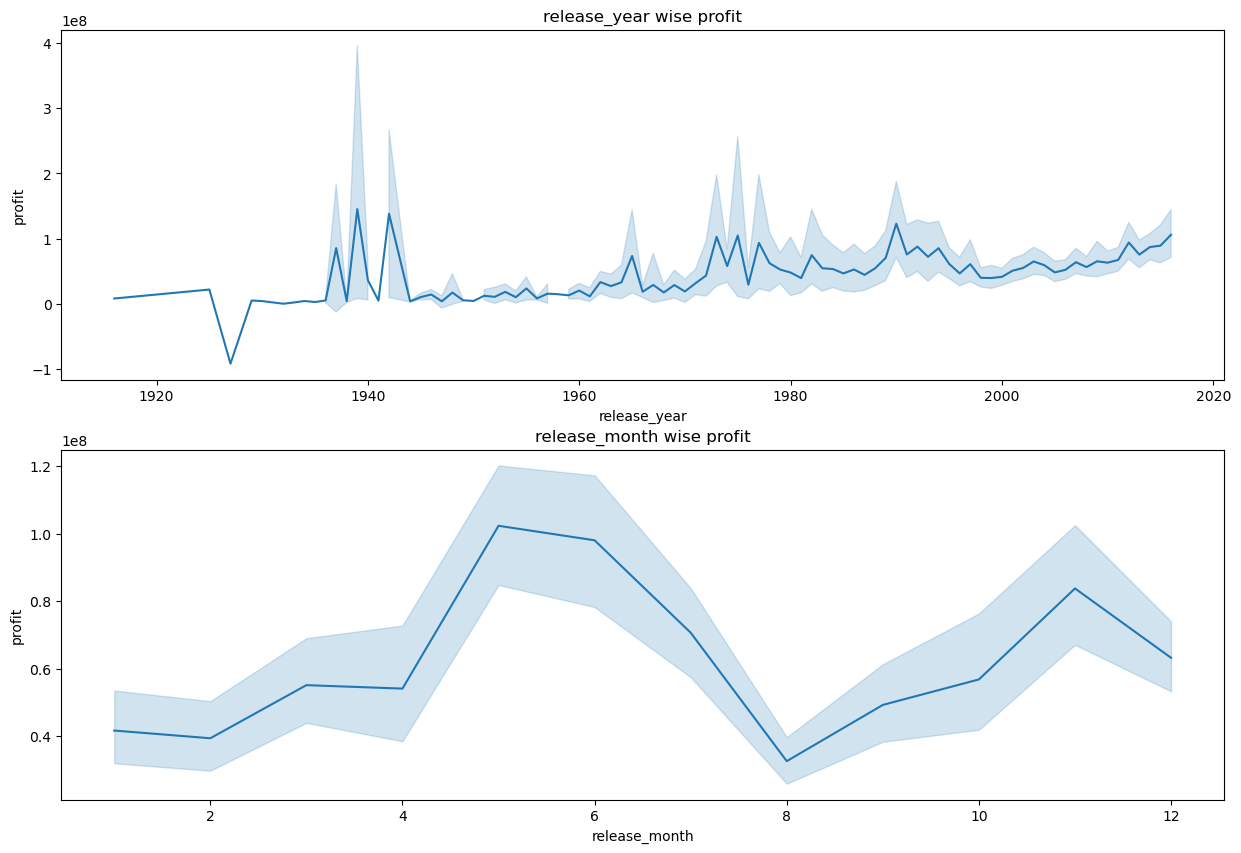

In [43]:
bi_rat("profit")

In [44]:
def cat_profits(col):
    sorted_df=movie_data.sort_values("profit",ascending=False).head(10)
    plt.figure(figsize=(5,3))
    sns.barplot(y= sorted_df[col], x=sorted_df['profit'], data= movie_data,orient="h")
    plt.ylabel(col)
    plt.xlabel('profit')
    plt.title(f'{col} vs profit')
    plt.show()

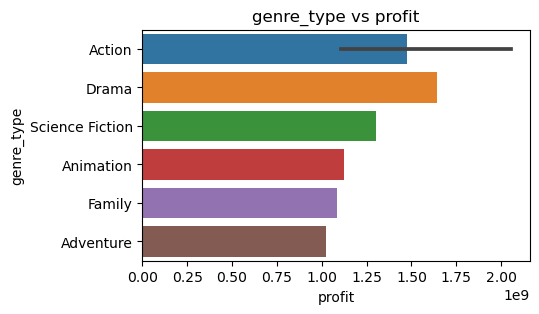

In [45]:
cat_profits("genre_type")

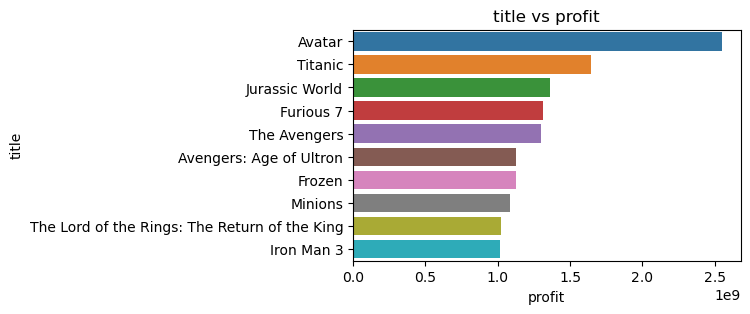

In [46]:
cat_profits("title")

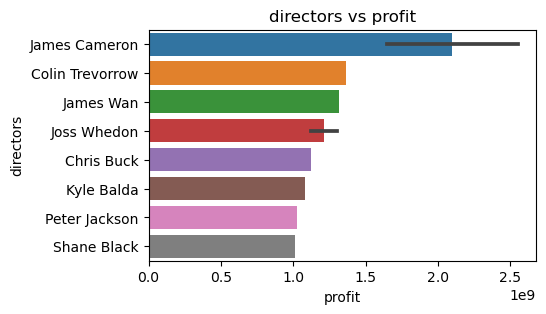

In [47]:
cat_profits("directors")

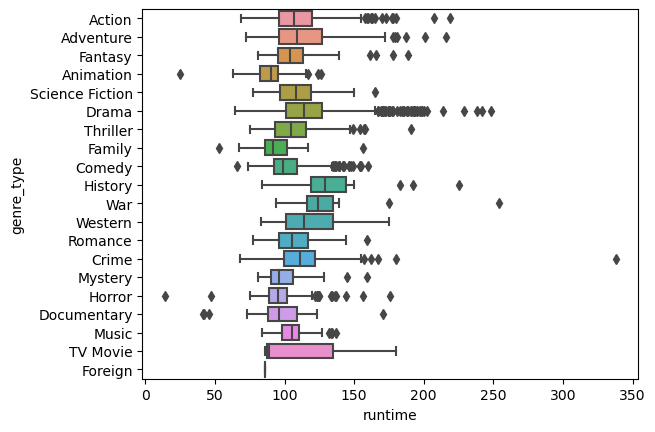

In [48]:
sns.boxplot(x="runtime",y="genre_type",data=movie_data)
plt.show()

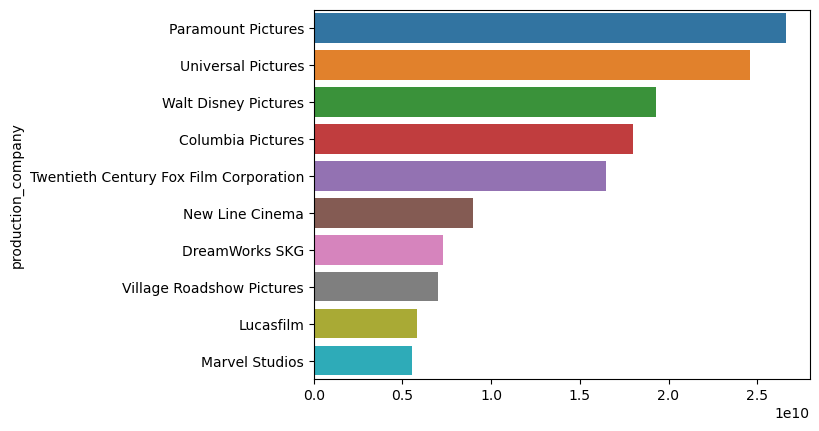

In [49]:
top_10 = movie_data.groupby(movie_data['production_company'])['profit'].sum()
top_10=top_10.sort_values(ascending=False).head(10)
sns.barplot(y=top_10.index,x=top_10.values)
plt.show()

## Multivariate

### 1. Show top 10 action movies which are released after 2012 based on revenue

In [50]:
task1=movie_data[(movie_data["status"]=="Released") & (movie_data["release_year"]>2011)]
task1=task1.sort_values("revenue",ascending=False).head(10)

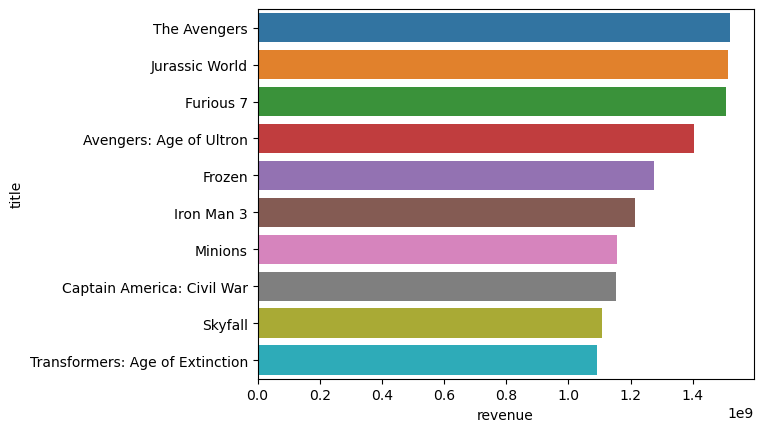

In [51]:
sns.barplot(y=task1["title"],x=task1["revenue"])
plt.show()

### 2. Show top 10 popular drama type english movies with minimum runtime 150 mins.

In [52]:
task2=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["original_language"]=="en") & (movie_data["runtime"]>=150)]
task2=task2.sort_values("popularity",ascending=False).head(10)

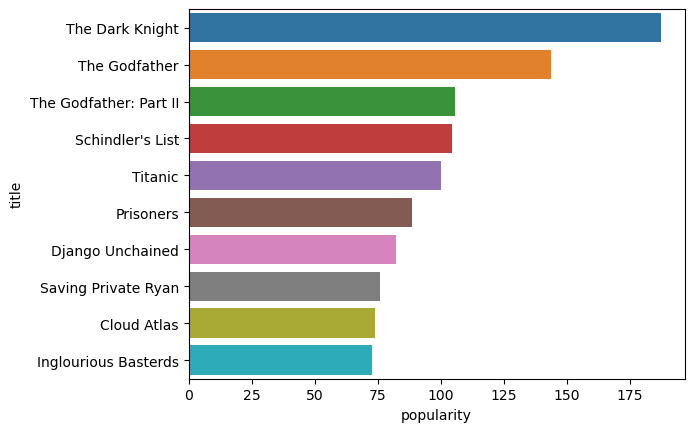

In [53]:
sns.barplot(y=task2["title"],x=task2["popularity"])
plt.show()

### 3.Top 10 directors based on total profit who released movie in between 2000 to 2010 and popularity over 100.

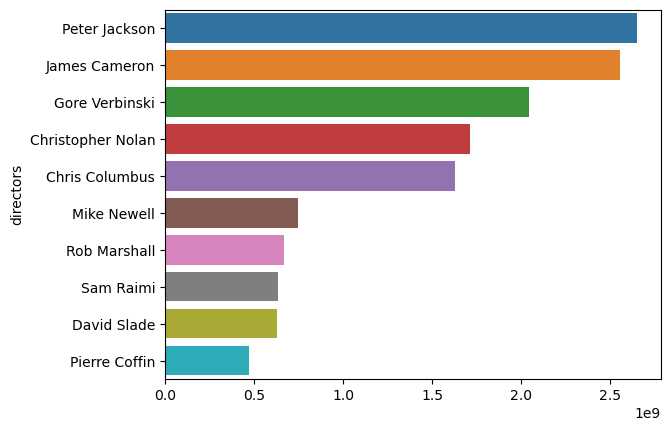

In [54]:

task3=movie_data[(movie_data["popularity"]>=100) & (movie_data["release_year"].between(2000,2011))]
task3 = task3.groupby(task3['directors'])['profit'].sum()
task3=task3.sort_values(ascending=False).head(10)
sns.barplot(y=task3.index,x=task3.values)
plt.show()

### 4. Top 10 popular movie's lead actor's name who worked with Walt Disney Pictures movie production company and did comedy movie.

In [55]:
task4=movie_data[(movie_data["production_company"]=="Walt Disney Pictures") & (movie_data["genre_type"]=="Comedy")]
task4=task4.sort_values("popularity",ascending=False).head(10)

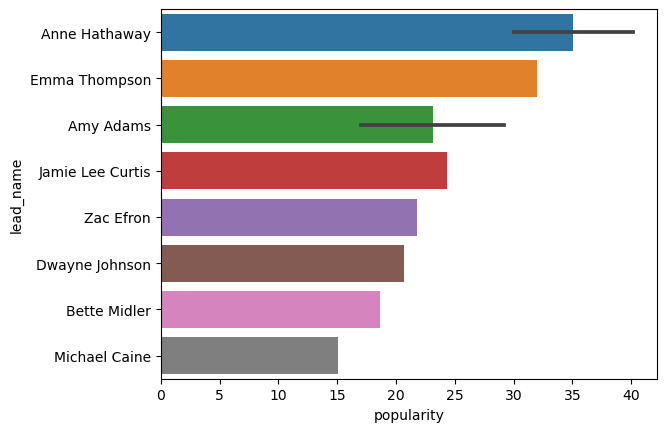

In [56]:
sns.barplot(y=task4["lead_name"],x=task4["popularity"])
plt.show()

### 5. Top 10 directors with highest budget that movie released after 2010 and avg vote got more than 5 and released in the month of may or june.

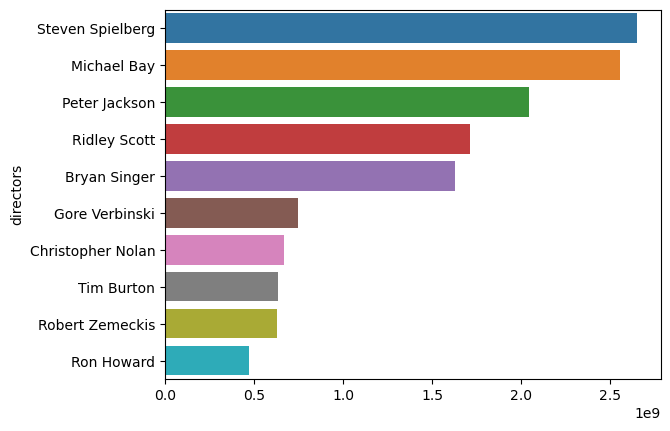

In [57]:

task5=movie_data[(movie_data["vote_average"]>5) & (movie_data["release_year"]>2010) & (movie_data["release_month"].between(5,7))]
task5 = movie_data.groupby(movie_data['directors'])['budget'].sum()
task5=task5.sort_values(ascending=False).head(10)
sns.barplot(y=task5.index,x=task3.values)
plt.show()

### 6. Top 5  drama type movies based on profit which released between october to december

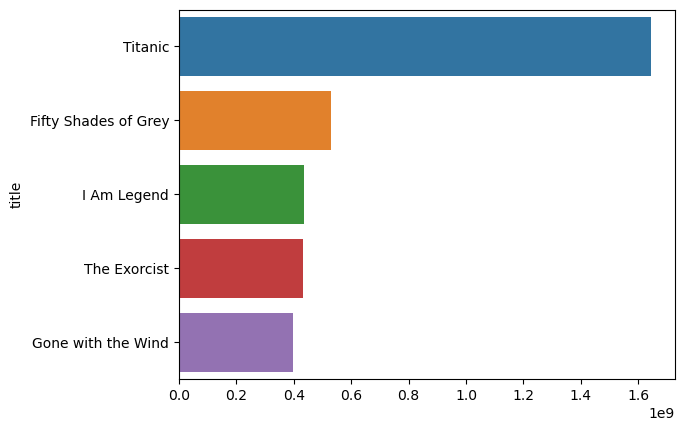

In [58]:
task6=movie_data[(movie_data["genre_type"]=="Drama") & (movie_data["release_month"].between(10,12))]
task6 = task6.groupby(task6['title'])['profit'].sum()
task6=task6.sort_values(ascending=False).head(5)
sns.barplot(y=task6.index,x=task6.values)
plt.show()

### 7. Top 5 action type english movies based on budget which released between april to august

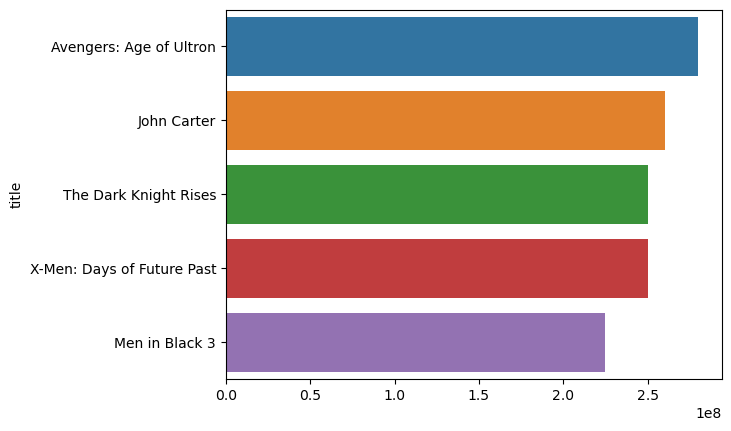

In [59]:
task7=movie_data[(movie_data["genre_type"]=="Action") & (movie_data["release_month"].between(4,8))&(movie_data["original_language"]=="en")]
task7 = task7.groupby(task7['title'])['budget'].sum()
task7=task7.sort_values(ascending=False).head(5)
sns.barplot(y=task7.index,x=task7.values)
plt.show()

### exporting data as csv file

In [571]:
# movie_data.to_csv("movie_data.csv")

##  -----------------------------------------------------Machine Learning-----------------------------------------------------

In [572]:
new_data=movie_data.copy()
new_data.head(2)

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,title,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chatacter_name,directors,profit
0,237000000.0,en,150.437577,2.787965e+09,162.0,Released,7.2,11800,Avatar,2009.0,10.0,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2.550965e+09
1,300000000.0,en,139.082615,9.610000e+08,169.0,Released,6.9,4500,Pirates of the Caribbean: At World's End,2007.0,5.0,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,6.610000e+08


## Bivariate Analysis on Categorical columns

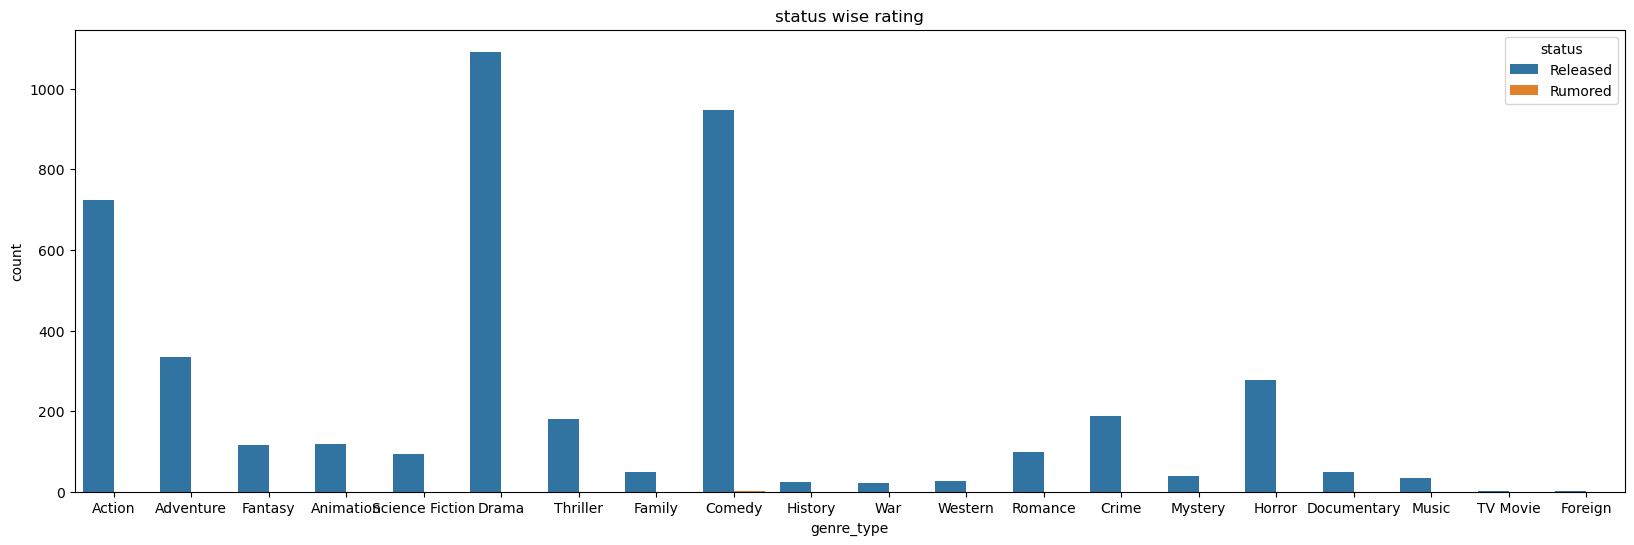

In [573]:
plt.figure(figsize=(20,6))
sns.countplot(x="genre_type",hue="status",data=new_data)
plt.title("status wise rating")
plt.show()

## Bivariate Analysis on Numerical columns

In [574]:
def hist_box1(*s):
    for col in s:
        plt.figure(figsize=(20,7))
        sns.boxplot(y=col,x="genre_type",data=new_data)
        plt.title(f"Distribution using boxplot of {col}")
        plt.show()

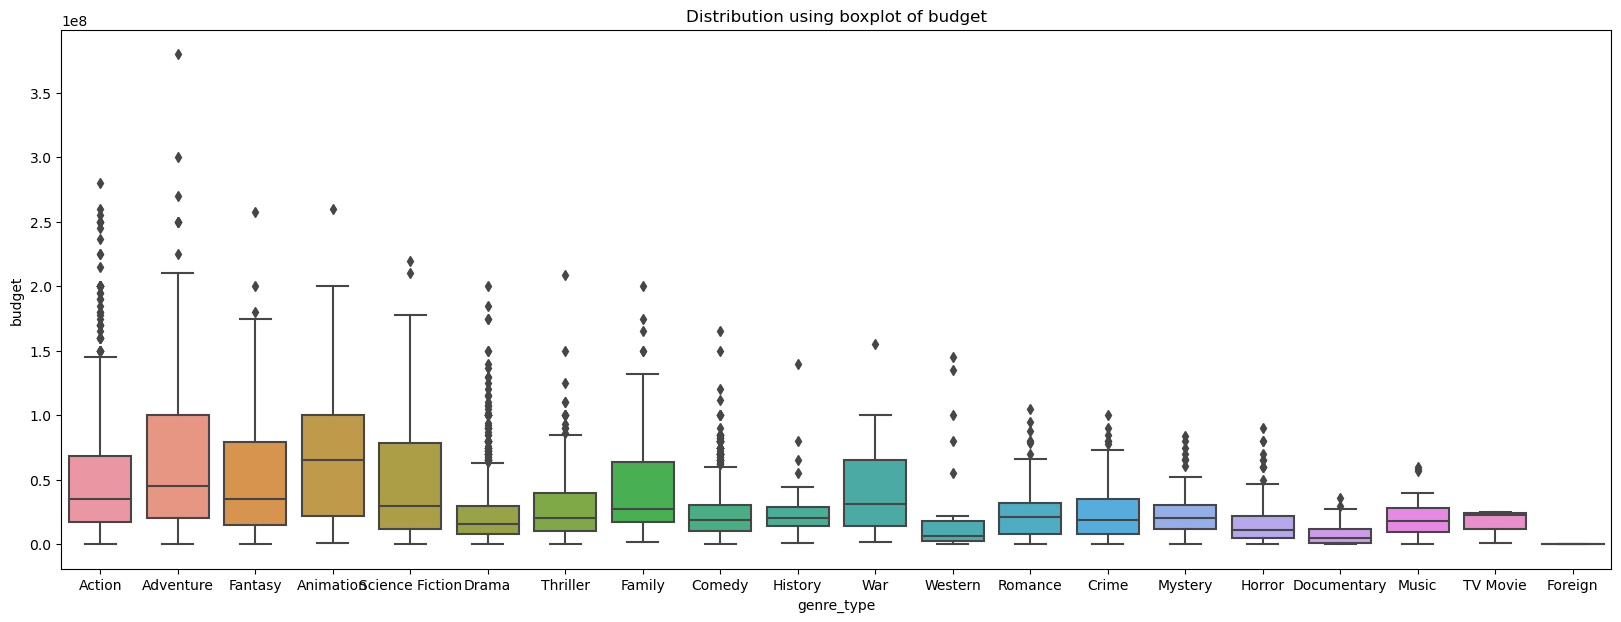

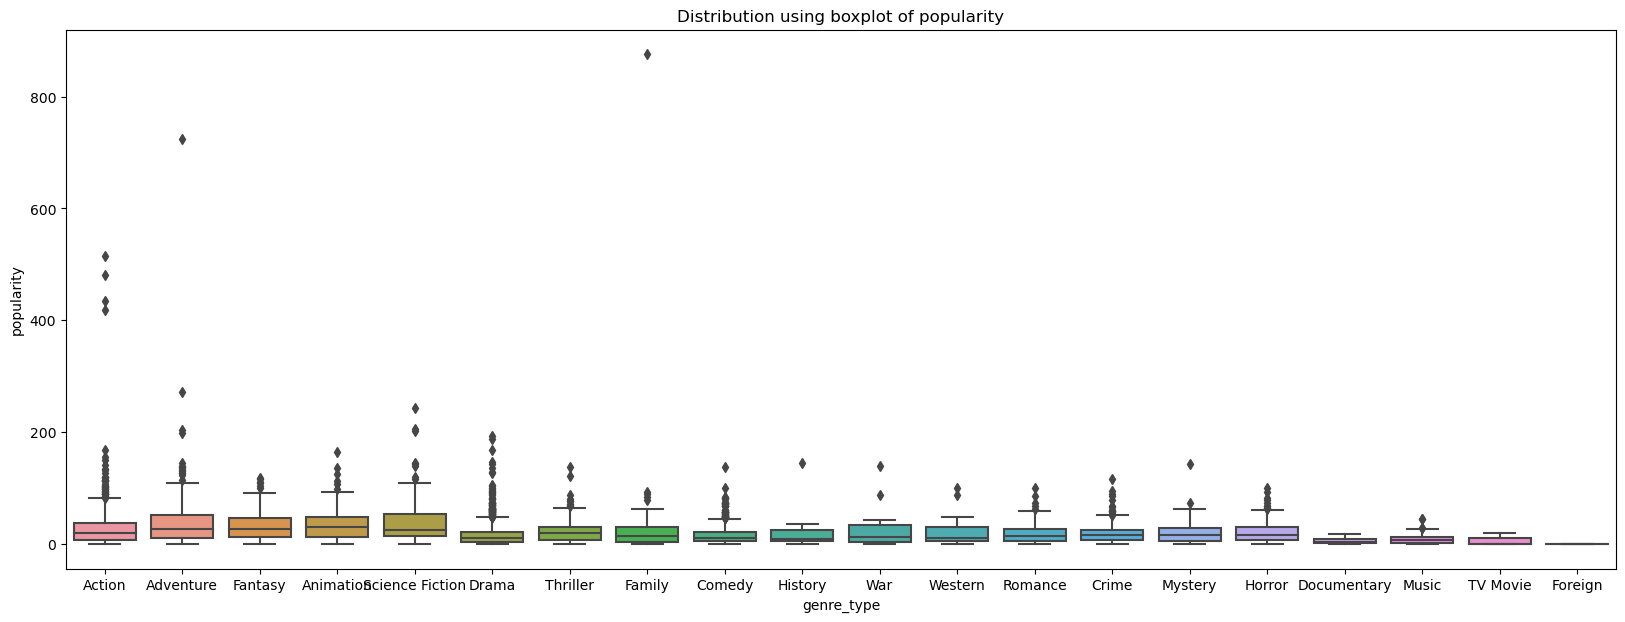

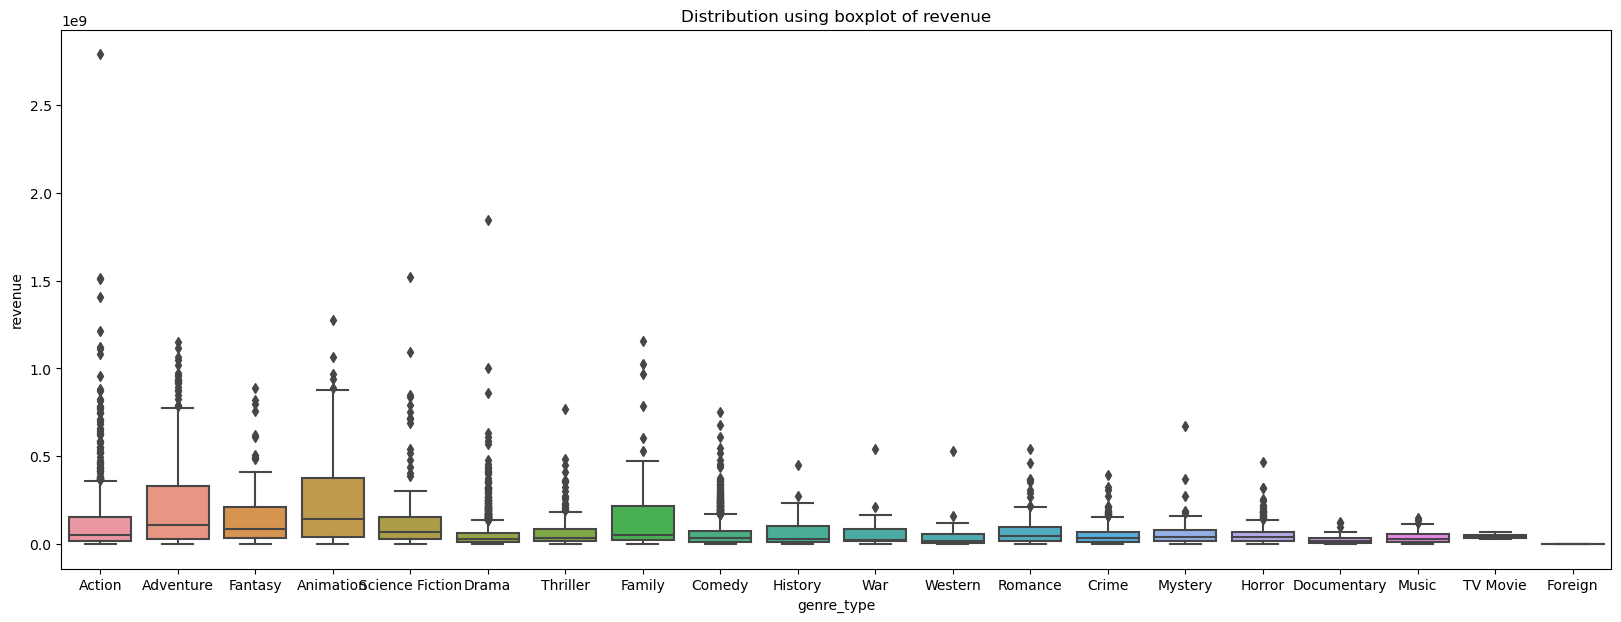

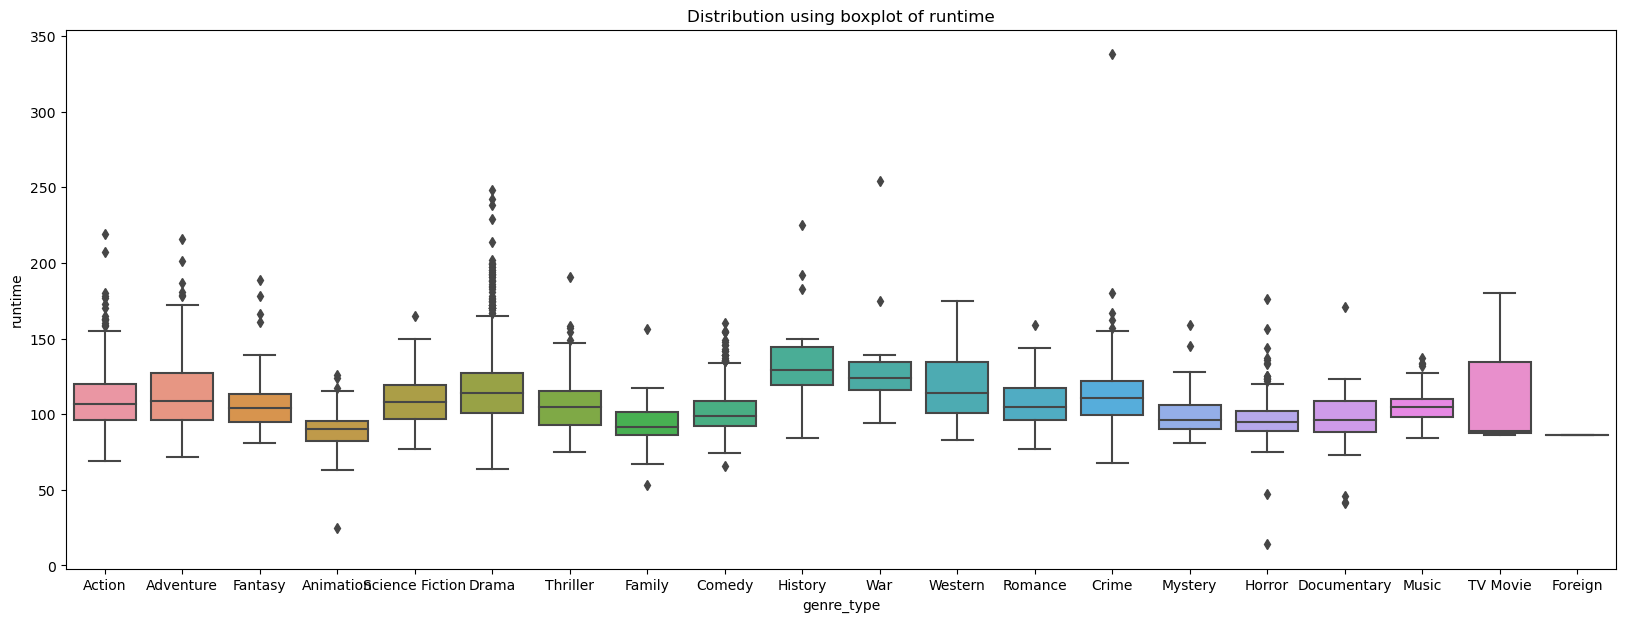

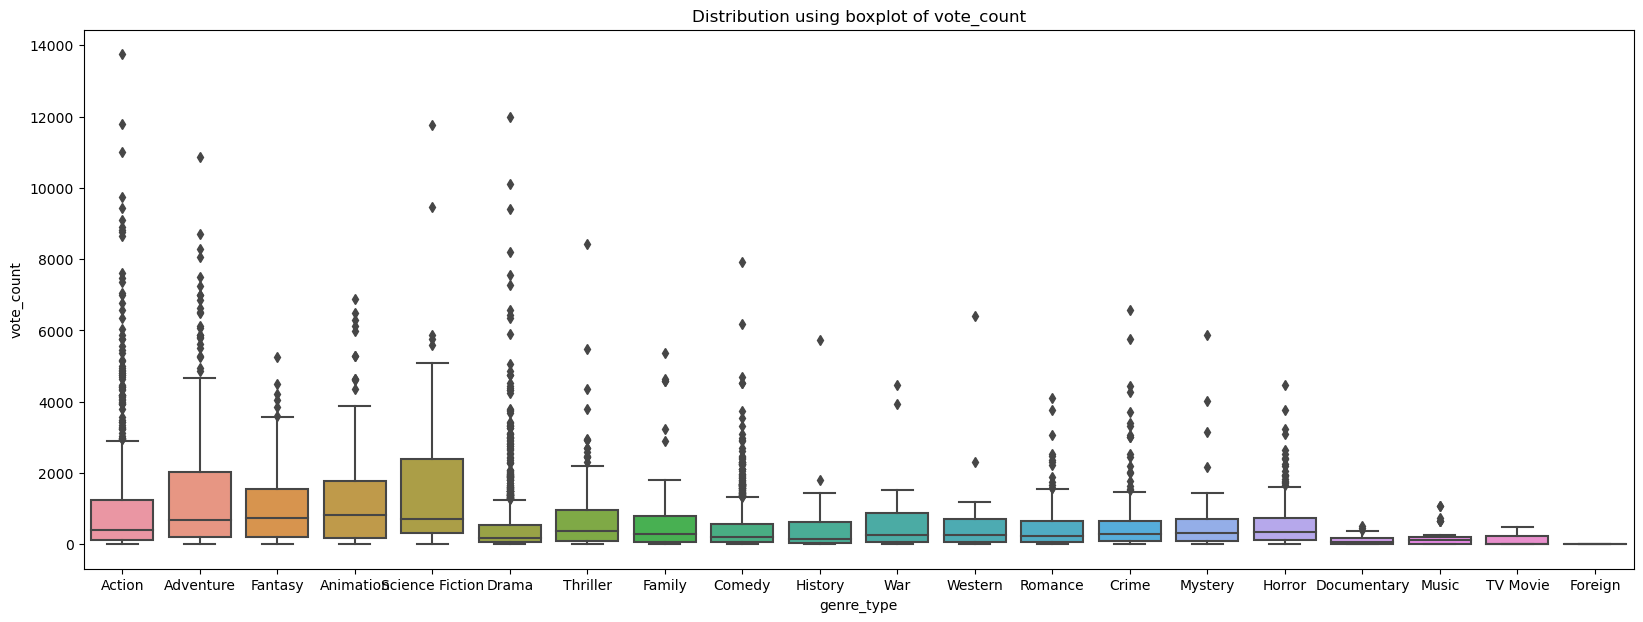

In [575]:
hist_box1("budget","popularity","revenue","runtime","vote_count")

## Dropping genres with very less number of existance in the data

In [576]:
new_data["genre_type"].value_counts()

Drama              1092
Comedy              948
Action              724
Adventure           334
Horror              277
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance              99
Science Fiction      94
Family               50
Documentary          49
Mystery              40
Music                33
Western              27
History              24
War                  22
TV Movie              3
Foreign               1
Name: genre_type, dtype: int64

In [577]:
new_data=new_data[(new_data["genre_type"]!="TV Movie")&(new_data["genre_type"]!="Foreign")]

In [578]:
new_data["genre_type"].value_counts()

Drama              1092
Comedy              948
Action              724
Adventure           334
Horror              277
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance              99
Science Fiction      94
Family               50
Documentary          49
Mystery              40
Music                33
Western              27
History              24
War                  22
Name: genre_type, dtype: int64

## Feature Extraction

In [579]:
# converting all categorical values to numerical values.
for col in new_data.select_dtypes("object"):
     new_data[col]=LabelEncoder().fit_transform(new_data[col])

In [580]:
new_data.head(2)

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,title,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chatacter_name,directors,profit
0,237000000.0,6,150.437577,2.787965e+09,162.0,0,7.2,11800,350,2009.0,10.0,0,64,1558,597,1705,788,2.550965e+09
1,300000000.0,6,139.082615,9.610000e+08,169.0,0,6.9,4500,2423,2007.0,5.0,1,64,886,1234,540,684,6.610000e+08


### Balancing data by Over sampling(SMOTE)

In [581]:
A=new_data.drop(["genre_type"],axis=1)
B=new_data["genre_type"]

In [582]:
# Balancing data by oversampling.
sm=SMOTE(random_state=42)
A_bal,B_bal=sm.fit_resample(A,B)

In [583]:
# creating new Dataframe with balanced data
balanced_data=A_bal.copy()
balanced_data["genre_type"]=B_bal

In [584]:
balanced_data.shape

(19656, 18)

## Visualising Balanced Data

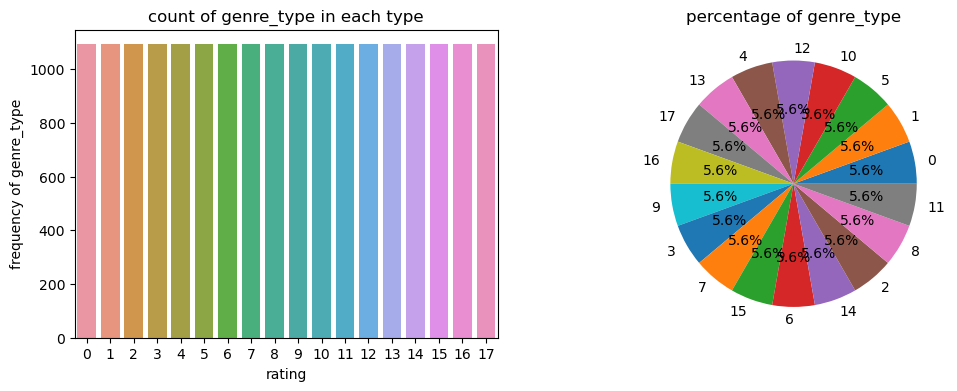

In [585]:
# visualising the balance of the data.
value_counts=balanced_data["genre_type"].value_counts()
fig,ax=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=value_counts.index,y=value_counts.values,ax=ax[0])
ax[0].set_title("count of genre_type in each type")
ax[0].set_xlabel("rating")
ax[0].set_ylabel("frequency of genre_type")

per=balanced_data["genre_type"].value_counts(normalize=True)*100
ax[1].pie(per.values,labels=per.index,autopct="%1.1f%%")
ax[1].set_title("percentage of genre_type")
plt.show()

## Correlations between features

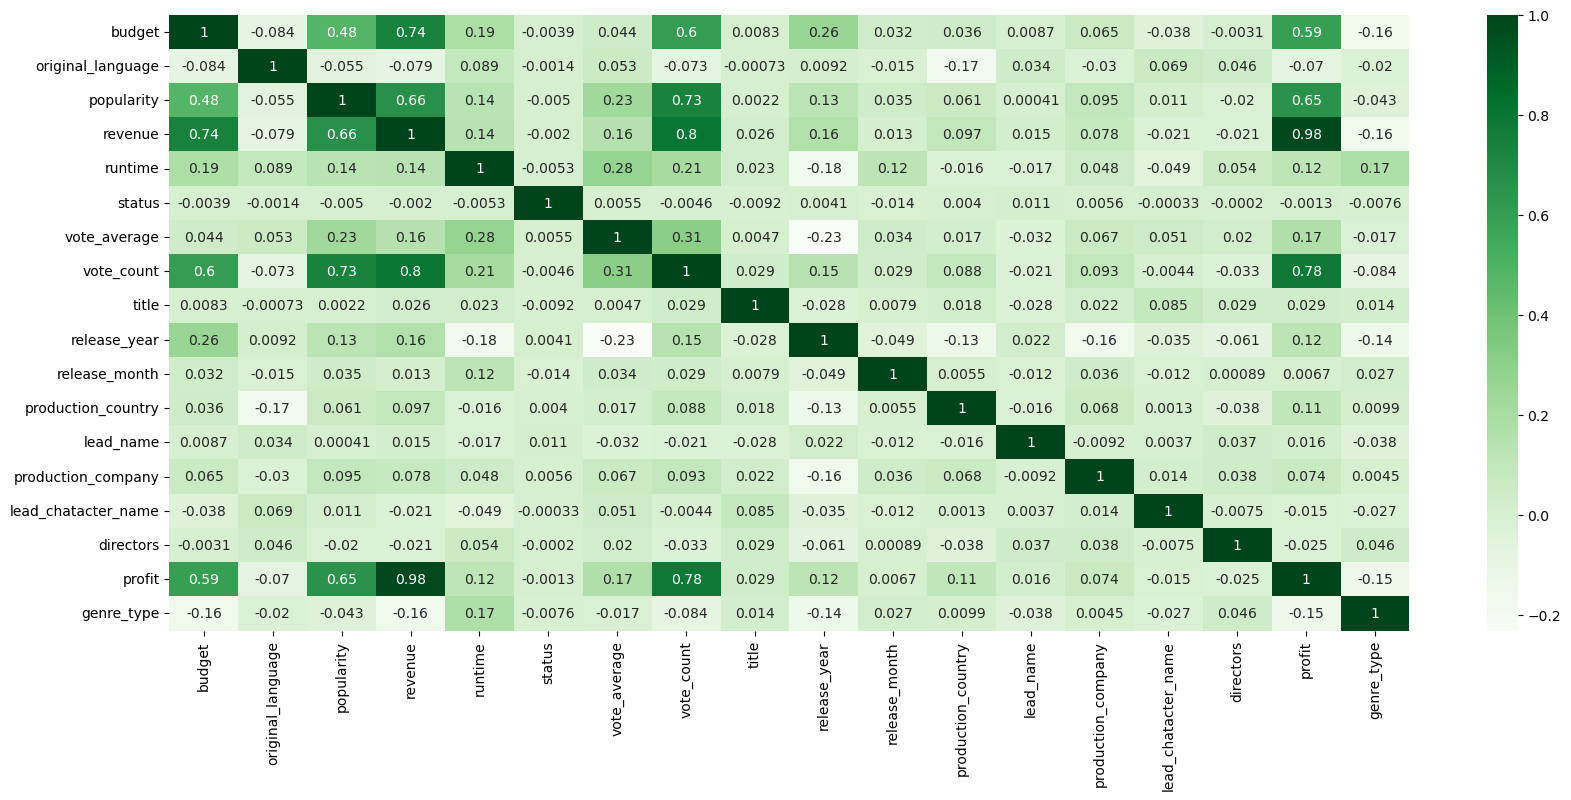

In [586]:
# correlations between the features
correlation_matrix=balanced_data.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix,annot=True,cmap="Greens")
plt.show()

### Feature selection by dropping unnecessary columns

In [587]:
balanced_data.drop(["status","production_country","production_company","vote_count","budget","profit"],axis=1,inplace=True)

In [588]:
X=balanced_data.drop(["genre_type"],axis=1)
y=balanced_data["genre_type"]

### Scaling Balanced data

In [589]:
scaled_x=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [590]:
scaled_data=scaled_x.copy()
scaled_data["genre_type"]=y
scaled_data

,original_language,popularity,revenue,runtime,vote_average,title,release_year,release_month,lead_name,lead_chatacter_name,directors,genre_type
0,-0.189607,3.682679,16.431019,2.660160,0.977739,-1.720462,0.570726,1.071675,1.381542,-0.247197,-0.564971,0
1,-0.189607,3.351690,5.269721,3.004852,0.673279,0.174214,0.418675,-0.613608,-0.091033,-1.457867,-0.766542,1
2,-0.189607,2.427490,4.778997,1.970778,0.064361,0.621149,1.026880,1.071675,-1.166977,-0.230570,1.295688,0
3,-0.189607,2.571375,6.026890,2.807885,1.383684,0.993138,0.798803,0.060505,-1.320371,-1.528533,-1.470103,0
4,-0.189607,0.577978,1.134641,1.182911,-0.138612,-0.446377,0.798803,0.060505,1.703668,-0.030004,-1.929454,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19651,-0.189607,-0.560513,-0.527105,0.127953,0.855531,-0.011324,-2.413378,-0.329494,-0.435072,1.414486,1.154200,17
19652,2.183977,0.551688,-0.560656,2.847824,0.827219,0.170558,-2.398735,1.571298,-0.630101,-0.809405,1.338328,17
19653,-0.189607,-0.275262,-0.213601,1.139565,-0.921654,0.508730,0.332428,0.478050,0.373529,-1.369535,-0.084301,17
19654,-0.189607,0.443580,0.270224,0.067121,1.347787,1.258191,-0.378652,-0.243681,-0.432881,-0.198355,-0.780109,17


## Data Splitting

In [591]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [592]:
kf=KFold(n_splits=5,shuffle=True, random_state=42)

## Collection of Performance metrics

In [593]:
accuracy_train=[]
accuracy_test=[]
precision=[]
recall=[]
f1_scores=[]
def metrics(model):
    accuracy_train.append(ACCURACY_TRAIN)
    accuracy_test.append(ACCURACY_TEST)
    precision.append(PRECISION)
    recall.append(RECALL)
    f1_scores.append(F1_SCORE)

In [594]:
def metrics_print(model):
    print("Model accuracy score on training data :",model.score(x_train,y_train))
    average_accuracy_score_train.append(model.score(x_train,y_train))

    print("Model accuracy score on test data :",model.score(x_test,y_test))
    average_accuracy_score_test.append(model.score(x_test,y_test))

    print()
    PREC=precision_score(y_test,y_pred,average="macro")
    print("Model precision_score :",PREC)
    avg_prec.append(PREC)

    RCL=recall_score(y_test,y_pred,average="macro")
    print("Model recall_score :",RCL)
    avg_recall.append(RCL)

    F1=f1_score(y_test,y_pred,average="macro")
    print("Model f1_score:",F1)
    avg_f1.append(F1)

#     print("Model confusion matrix on test data :")
#     plt.figure(figsize=(6,4))
#     sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
#     plt.show()
#     print()
#     print("Model classification matrix on test data :\n",classification_report(y_test,y_pred))
    print("--"*50)
    print("--"*50)

In [595]:
def metrics_print1(model):
    
    ACCURACY_TRAIN=model.score(x_train,y_train)
    print("Model accuracy score on training data :",ACCURACY_TRAIN)
    
    ACCURACY_TEST=model.score(x_test,y_test)
    print("Model accuracy score on test data :",ACCURACY_TEST)
    print()

    PRECISION=precision_score(y_test,y_pred,average="macro")
    print("Model precision_score :",PRECISION)

    RECALL=recall_score(y_test,y_pred,average="macro")
    print("Model recall_score :",RECALL)

    F1_SCORE=f1_score(y_test,y_pred,average="macro")
    print("Model f1_score:",F1_SCORE)
    print()

#     print("Model confusion matrix on test data :")
#     plt.figure(figsize=(6,4))
#     sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
#     plt.show()

    print()

#     print("Model classification matrix on test data :\n",classification_report(y_test,y_pred))
    accuracy_train.append(ACCURACY_TRAIN)
    accuracy_test.append(ACCURACY_TEST)
    precision.append(PRECISION)
    recall.append(RECALL)
    f1_scores.append(F1_SCORE)

##  -------------------------------------------------------Model Ctreation-------------------------------------------------------

## Logistic Regression

In [596]:
average_accuracy_score_train=[]
average_accuracy_score_test=[]
avg_prec=[]
avg_recall=[]
avg_f1=[]
for train_data,test_data in kf.split(scaled_data):
    train,test=scaled_data.iloc[train_data],scaled_data.iloc[test_data]
    x_train=train.drop("genre_type",axis=1)
    y_train=train["genre_type"]
    
    x_test=test.drop("genre_type",axis=1)
    y_test=test["genre_type"]
    
    log_model=LogisticRegression().fit(x_train,y_train)
    y_pred=log_model.predict(x_test)
    
    metrics_print(log_model)

lg_ac_train=average_accuracy_score_train.copy()
lg_ac_test=average_accuracy_score_test.copy()
ACCURACY_TRAIN=np.mean(average_accuracy_score_train)
ACCURACY_TEST=np.mean(average_accuracy_score_test)   
print("Average Accuracy score of test on different K-Fold",ACCURACY_TEST)

PRECISION=np.mean(avg_prec) 

RECALL=np.mean(avg_recall) 
F1_SCORE=np.mean(avg_f1) 
metrics(log_model)
    

Model accuracy score on training data : 0.2798270160264564
Model accuracy score on test data : 0.27009155645981686

Model precision_score : 0.23610477829249657
Model recall_score : 0.2694711142021307
Model f1_score: 0.2396390222762437
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.27783783783783783
Model accuracy score on test data : 0.28618672093614855

Model precision_score : 0.2557325994074874
Model recall_score : 0.28605987495194807
Model f1_score: 0.25646500307033737
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.27828298887122416
Model accuracy score on test data : 0.2612566776901552

Model pr

### Naive Baye's Method

In [597]:
average_accuracy_score_train=[]
average_accuracy_score_test=[]
avg_prec=[]
avg_recall=[]
avg_f1=[]

for train_data,test_data in kf.split(scaled_data):
    train,test=scaled_data.iloc[train_data],scaled_data.iloc[test_data]
    x_train=train.drop("genre_type",axis=1)
    y_train=train["genre_type"]
    
    x_test=test.drop("genre_type",axis=1)
    y_test=test["genre_type"]
    
    gss_model=GaussianNB().fit(x_train,y_train)
    y_pred=gss_model.predict(x_test)
    
    metrics_print(gss_model)
    
nv_ac_train=average_accuracy_score_train.copy()
nv_ac_test=average_accuracy_score_test.copy()
    
ACCURACY_TRAIN=np.mean(average_accuracy_score_train)
ACCURACY_TEST=np.mean(average_accuracy_score_test)
print("Average Accuracy score of test on different K-Fold",ACCURACY_TEST)

PRECISION=np.mean(avg_prec)  
RECALL=np.mean(avg_recall) 
F1_SCORE=np.mean(avg_f1) 
metrics(gss_model)

Model accuracy score on training data : 0.18710251844314424
Model accuracy score on test data : 0.1884537131230926

Model precision_score : 0.252665434755087
Model recall_score : 0.18751808194369768
Model f1_score: 0.1409026200638528
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.10950715421303657
Model accuracy score on test data : 0.10658865428644111

Model precision_score : 0.22928525407201084
Model recall_score : 0.10691576022016144
Model f1_score: 0.0832279187827813
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Model accuracy score on training data : 0.18944356120826708
Model accuracy score on test data : 0.17629102009666753

Model pr

## Decision tree classifier

In [598]:
param_grid={'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(10,101,20),
           'max_depth':np.arange(3,10)}

In [599]:
dt=DecisionTreeClassifier()

In [600]:
grid_cv=GridSearchCV(dt,param_grid,scoring="accuracy",cv=kf)

In [601]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='accuracy')

In [602]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=20)

In [603]:
dt_model=DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=20).fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [604]:
metrics_print1(dt_model)

Model accuracy score on training data : 0.4165341812400636
Model accuracy score on test data : 0.3800559654032053

Model precision_score : 0.3847115876417832
Model recall_score : 0.3748760903904072
Model f1_score: 0.3590853974589425




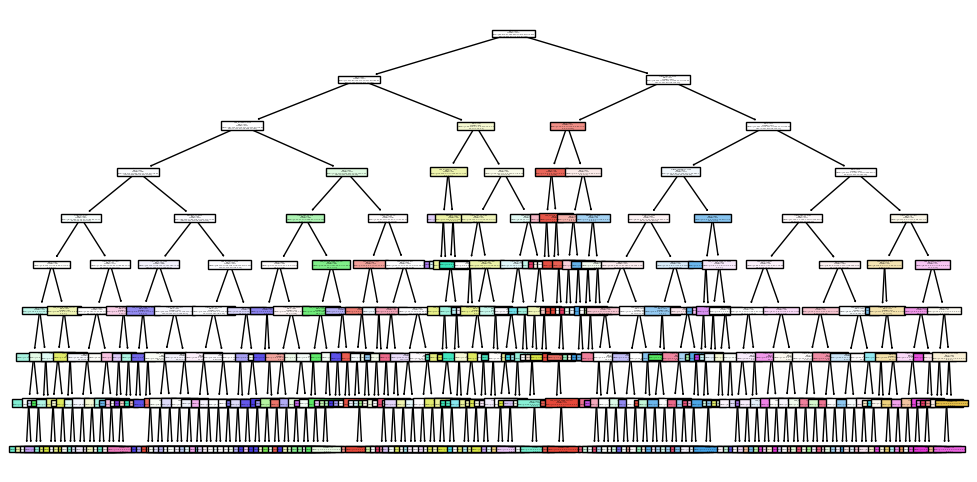

In [491]:
plt.figure(figsize=(12,6))
tree.plot_tree(dt_model,feature_names=scaled_x.columns,filled=True)
plt.show()

## Random forest classifier

In [501]:
param_grid={'n_estimators':np.arange(20,101,20),
           'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(3,10),
           'max_depth':np.arange(3,10)}

In [502]:
rf=RandomForestClassifier()

In [503]:
grid_cv=GridSearchCV(rf,param_grid,scoring="accuracy",cv=kf)

In [504]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='accuracy')

In [506]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=10)

In [605]:
rf_model=RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=10,random_state=42).fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [606]:
metrics_print1(rf_model)

Model accuracy score on training data : 0.6504928457869634
Model accuracy score on test data : 0.5695751717120325

Model precision_score : 0.5700097474723127
Model recall_score : 0.5643541955423778
Model f1_score: 0.53488203450367




## Adaboost classifier

In [494]:
param_grid={"n_estimators": np.arange(10,101,10),
           "learning_rate":np.arange(0.05,1,0.05)}

In [495]:
ada=AdaBoostClassifier()

In [496]:
grid_cv=GridSearchCV(ada,param_grid,scoring="accuracy",cv=kf)

In [497]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='accuracy')

In [498]:
grid_cv.best_estimator_

AdaBoostClassifier(learning_rate=0.45, n_estimators=60)

In [607]:
ada_model=AdaBoostClassifier(learning_rate=0.45, n_estimators=60,random_state=42).fit(x_train,y_train)
y_pred=ada_model.predict(x_test)

In [608]:
metrics_print1(ada_model)

Model accuracy score on training data : 0.22798092209856916
Model accuracy score on test data : 0.23123887051640804

Model precision_score : 0.23849604812943037
Model recall_score : 0.2287150558653643
Model f1_score: 0.21111996881852776




## K-Nearest Neighbors

In [455]:
accuracy_scores=[]
for k in range(130,150):
    knn_score=cross_val_score(KNeighborsClassifier(k),x_train,y_train,scoring="accuracy",cv=kf)
    accuracy_scores.append(np.mean(knn_score))

In [457]:
for k in range(130,150):
    print("number of neighbors:",k,":",round(accuracy_scores[k-130],4))

number of neighbors: 130 : 0.8518
number of neighbors: 131 : 0.8515
number of neighbors: 132 : 0.8507
number of neighbors: 133 : 0.8506
number of neighbors: 134 : 0.8508
number of neighbors: 135 : 0.8507
number of neighbors: 136 : 0.8494
number of neighbors: 137 : 0.8495
number of neighbors: 138 : 0.8491
number of neighbors: 139 : 0.8487
number of neighbors: 140 : 0.8476
number of neighbors: 141 : 0.8474
number of neighbors: 142 : 0.8472
number of neighbors: 143 : 0.8461
number of neighbors: 144 : 0.8458
number of neighbors: 145 : 0.8453
number of neighbors: 146 : 0.8443
number of neighbors: 147 : 0.8439
number of neighbors: 148 : 0.8434
number of neighbors: 149 : 0.8423


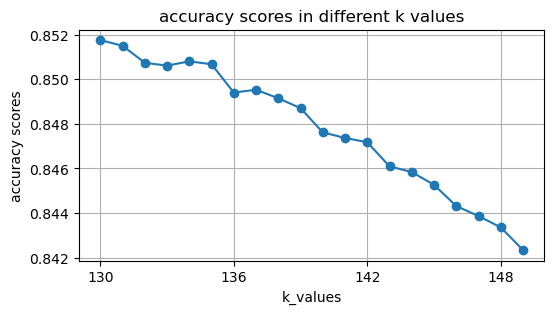

In [458]:
plt.figure(figsize=(6,3))
plt.plot(range(130,150),accuracy_scores,marker="o")
plt.ylabel("accuracy scores")
plt.xlabel("k_values")
plt.title("accuracy scores in different k values")
plt.xticks(range(130,150,6))
plt.grid()
plt.show()

In [609]:
k=130
knn_model=KNeighborsClassifier(k).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [610]:
metrics_print1(knn_model)

Model accuracy score on training data : 0.42499205087440384
Model accuracy score on test data : 0.4276265581277029

Model precision_score : 0.4025708965678734
Model recall_score : 0.42090237582264867
Model f1_score: 0.36156611136304917




## Stacked Classifier

In [611]:
level1=[]
level1.append(("lr",LogisticRegression()))
level1.append(("gss",GaussianNB()))
level1.append(("dt",DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=20)))
level1.append(("rf",RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=10,random_state=42)))
level1.append(("ada",AdaBoostClassifier(learning_rate=0.45, n_estimators=60,random_state=42)))
level1.append(("knn",KNeighborsClassifier(130)))
level1.append(("svm",SVC()))

level2=LogisticRegression()

In [612]:
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf).fit(x_train,y_train)
y_pred=stack_model.predict(x_test)

In [613]:
metrics_print1(stack_model)

Model accuracy score on training data : 0.6391096979332274
Model accuracy score on test data : 0.6062070719918595

Model precision_score : 0.5706221542547127
Model recall_score : 0.601807739988862
Model f1_score: 0.5689114073201792




## Best Model Selection

In [616]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score"]

In [617]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    x=[[model_list[i],accuracy_train[i],accuracy_test[i],precision[i],recall[i],f1_scores[i]]]
    new=pd.DataFrame(x)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,Accuracy(train),Accuracy(test),Precision,Recall,F1 score
0,Logistic Regression,0.277307,0.273555,0.248723,0.274305,0.245788
1,Gaussian Model,0.172708,0.169311,0.234941,0.170162,0.125458
2,Decision Tree classifier,0.416534,0.380056,0.384712,0.374876,0.359085
3,Random Forest classifier,0.650493,0.569575,0.570010,0.564354,0.534882
4,Ada-boost classifier,0.227981,0.231239,0.238496,0.228715,0.211120
5,KNN classifier,0.424992,0.427627,0.402571,0.420902,0.361566
6,Stacked classifier,0.639110,0.606207,0.570622,0.601808,0.568911


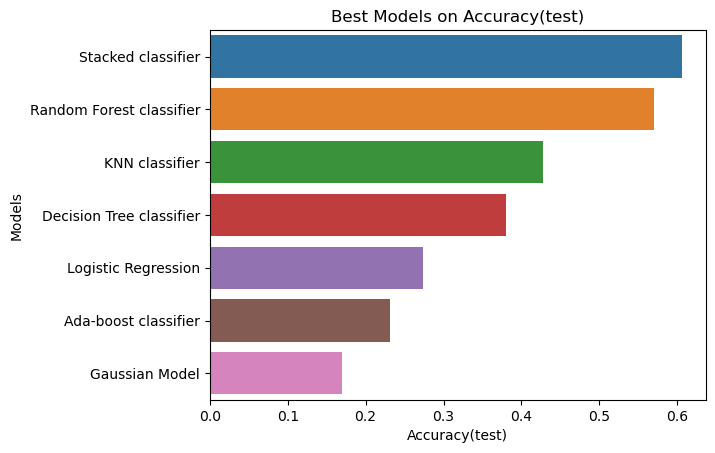

In [618]:
results=final_results.sort_values("Accuracy(test)",ascending=False)
sns.barplot(x="Accuracy(test)",y="Models",data=results)
plt.title("Best Models on Accuracy(test)")
plt.show()

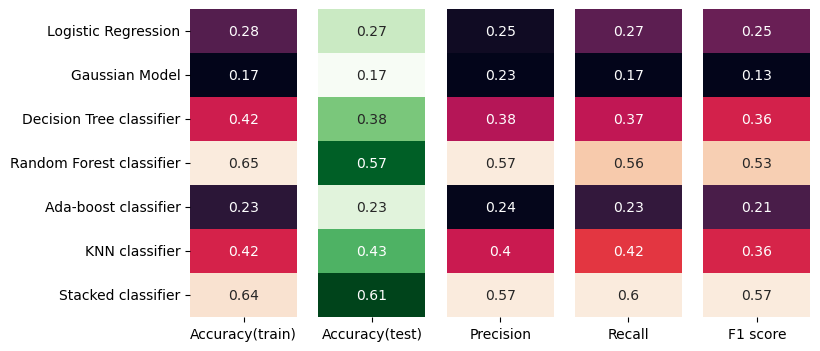

In [619]:
fig,ax=plt.subplots(1,5,figsize=(8,4))

sns.heatmap(final_results[["Accuracy(train)"]],annot=True,yticklabels=model_list,ax=ax[0],cbar=False)
sns.heatmap(final_results[["Accuracy(test)"]],annot=True,ax=ax[1],yticklabels=False,cbar=False,cmap="Greens")
sns.heatmap(final_results[["Precision"]],annot=True,ax=ax[2],yticklabels=False,cbar=False)
sns.heatmap(final_results[["Recall"]],annot=True,ax=ax[3],yticklabels=False,cbar=False)
sns.heatmap(final_results[["F1 score"]],annot=True,ax=ax[4],yticklabels=False,cbar=False)
plt.show()

In [620]:
log_score=lg_ac_test
gss_score=nv_ac_test
dt_score=cross_val_score(dt_model,x_train,y_train,scoring="accuracy",cv=kf)
rf_score=cross_val_score(rf_model,x_train,y_train,scoring="accuracy",cv=kf)
ada_score=cross_val_score(ada_model,x_train,y_train,scoring="accuracy",cv=kf)
knn_score=cross_val_score(knn_model,x_train,y_train,scoring="accuracy",cv=kf)
stack_score=cross_val_score(stack_model,x_train,y_train,scoring="accuracy",cv=kf)

all_scores=[log_score,gss_score,dt_score,rf_score,ada_score,knn_score,stack_score]

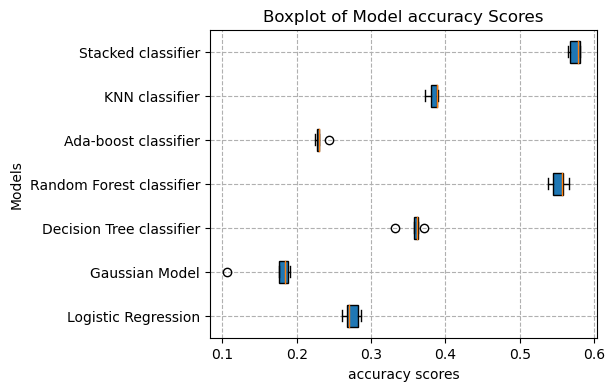

In [621]:
plt.figure(figsize=(5,4))
plt.boxplot(all_scores,labels=model_list,vert=False,patch_artist=True)
plt.title("Boxplot of Model accuracy Scores")
plt.xlabel("accuracy scores")
plt.ylabel("Models")
plt.grid(axis='y', linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

### Stacked classifier is best ML classifier  process to predict Rating